# MSc in AI - CE6002 & CS5062 
### Etivity 2 - Data preparation & Can we learn?
Student Name: Michel Danjou

Student ID: 18263461


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle


# Task 1 (CS5062)

*Fill-in the missing values in the bank dataset. Use the EDA techniques from E-tivity 1 to decide how to fill in missing values. In your notebook, explain shortly (max 250 words) the decisions you have taken.*

## Load the dataset

In [2]:
# Load the data
data = pd.read_csv("bank_et2.csv") 

In [3]:
data.head()

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


## Indentify the missing values

In [4]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Unnamed: 0        0
age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

The colums with missing value are:
  * age              12
  * job              10
  * education       104
  * contact         191
  * poutcome        454
  
Lets print the rows where at least one of these column as a missing value

In [5]:
null_columns=data.columns[data.isnull().any()]
columns = ['age', 'job', 'education', 'contact', 'poutcome']
for col in columns:
    print("\n{}:".format(col))
    print(data[data[col].isnull()][null_columns])
    


age:
      age            job  education    contact poutcome
456   NaN  self-employed   tertiary   cellular  failure
472   NaN    blue-collar    primary  telephone  failure
526   NaN       services  secondary   cellular  failure
595   NaN     management   tertiary   cellular  failure
597   NaN  self-employed  secondary   cellular  failure
601   NaN         admin.  secondary   cellular  failure
605   NaN     management   tertiary   cellular  failure
744   NaN     management   tertiary   cellular  failure
795   NaN     technician   tertiary   cellular  success
1171  NaN        retired   tertiary   cellular  success
1232  NaN        student  secondary   cellular  success
1408  NaN  self-employed   tertiary   cellular      NaN

job:
       age  job  education    contact poutcome
255   42.0  NaN    primary   cellular  failure
257   46.0  NaN        NaN   cellular  failure
831   41.0  NaN    primary        NaN      NaN
1223  55.0  NaN  secondary   cellular  success
1281  50.0  NaN        Na

## age

Let's start by printing the samples where `age` is missing since there are only 12 of them.

In [6]:
data[data['age'].isna()]

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
456,456,NaN,self-employed,married,tertiary,no,917,0.311161,-0.818688,no,no,cellular,6,feb,518,3,212,5,failure,no
472,472,NaN,blue-collar,married,primary,no,474,0.729179,0.350980,yes,yes,telephone,9,feb,152,3,221,1,failure,no
526,526,NaN,services,married,secondary,no,2478,0.469463,0.180632,yes,no,cellular,28,jan,347,1,230,1,failure,no
595,595,NaN,management,married,tertiary,no,1857,-0.137751,0.524516,no,no,cellular,29,jan,386,1,168,4,failure,no
597,597,NaN,self-employed,married,secondary,yes,254,0.800582,0.370658,yes,yes,cellular,29,jan,194,1,188,1,failure,no
601,601,NaN,admin.,single,secondary,no,111,0.269082,0.060002,yes,no,cellular,29,jan,55,1,195,3,failure,no
605,605,NaN,management,married,tertiary,no,1330,1.007376,-0.459770,yes,no,cellular,29,jan,41,2,261,1,failure,no
744,744,NaN,management,married,tertiary,no,-61,0.638129,-1.001420,no,no,cellular,30,jan,90,5,172,1,failure,no
795,795,NaN,technician,single,tertiary,no,992,0.901646,-0.098458,yes,no,cellular,4,may,301,1,88,2,success,no
1171,1171,NaN,retired,married,tertiary,no,2812,-0.336489,2.210606,no,no,cellular,3,aug,392,4,181,3,success,yes


We could backfill the missing `age` fields using the mean age value we calculated to be 41 in Etivity 1. However this would certainly be unrealistic for 2 samples:
  * sample 1171, which represents a retiree 
  * sample 1232, which represents a student
  
A better way is to generate a pivot table but first lets start by studying the value of `age` in relation to other data to determine which attributes to use in our pivot.

### Identify which features are best suited to define the `age`

Here we simply iterate over a few combinations of interesting features with a view  to find the one that best define the age.
Amongst the features that I short-listed are:
  * `job`,`housing`
  * `job`,`loan`
  * `job`,`subscribed`
  * `job`,`marital`

<Figure size 1080x1440 with 0 Axes>

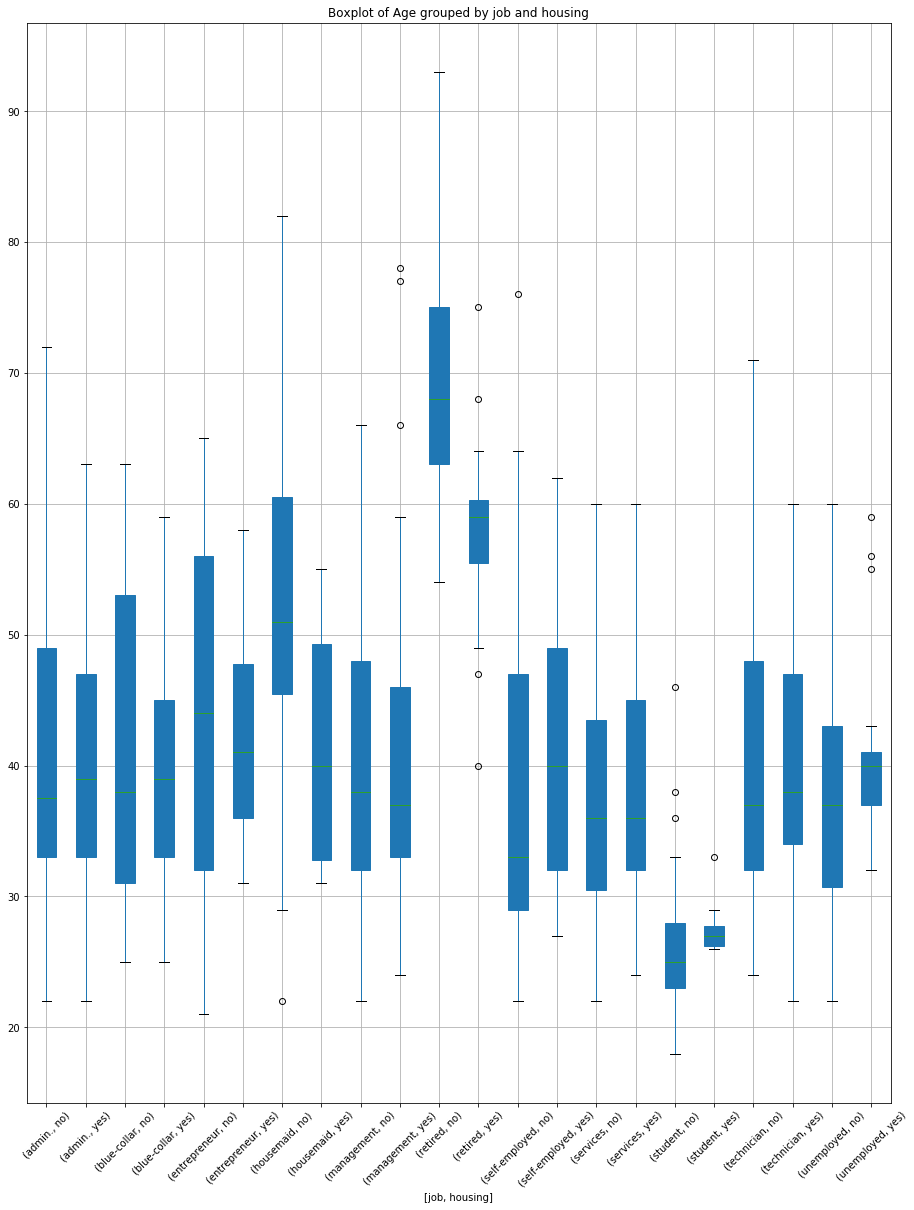

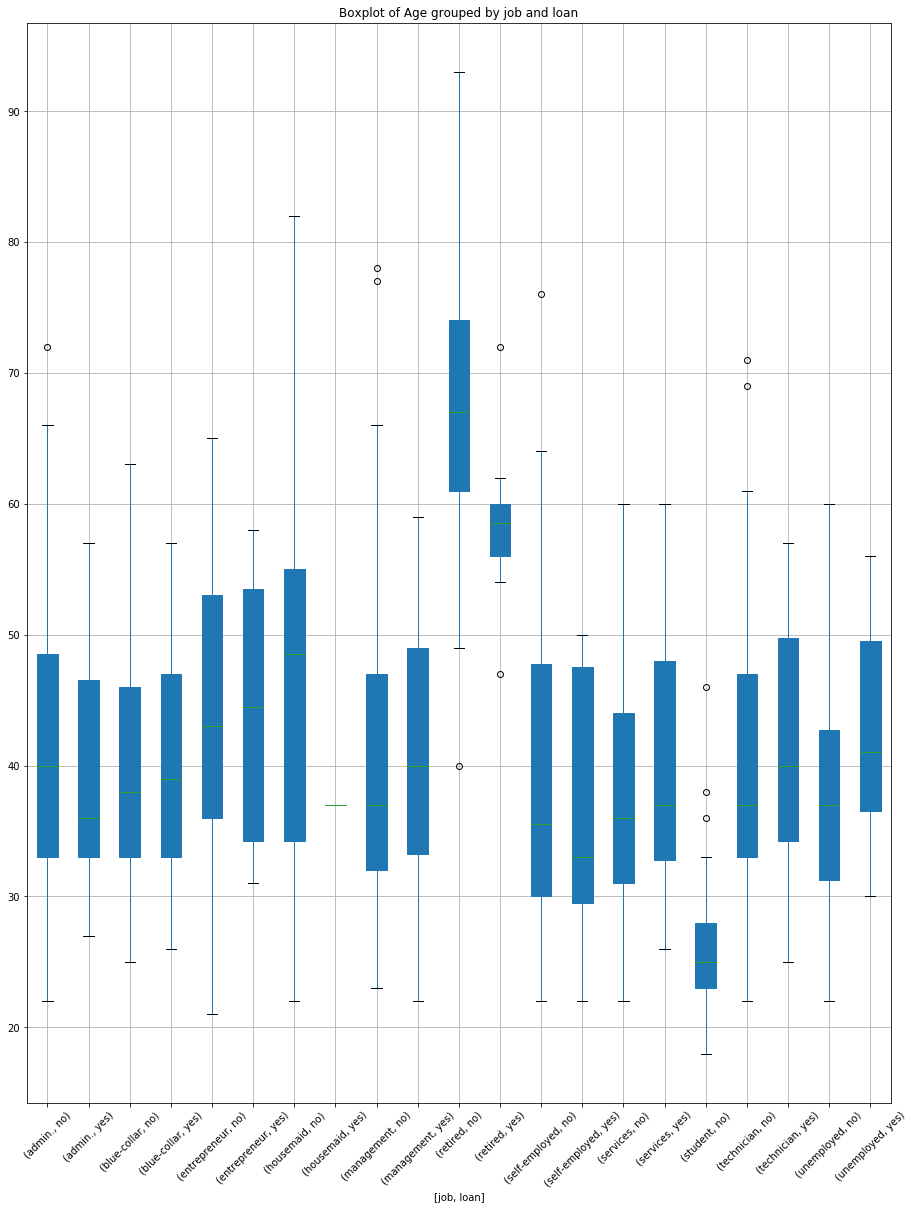

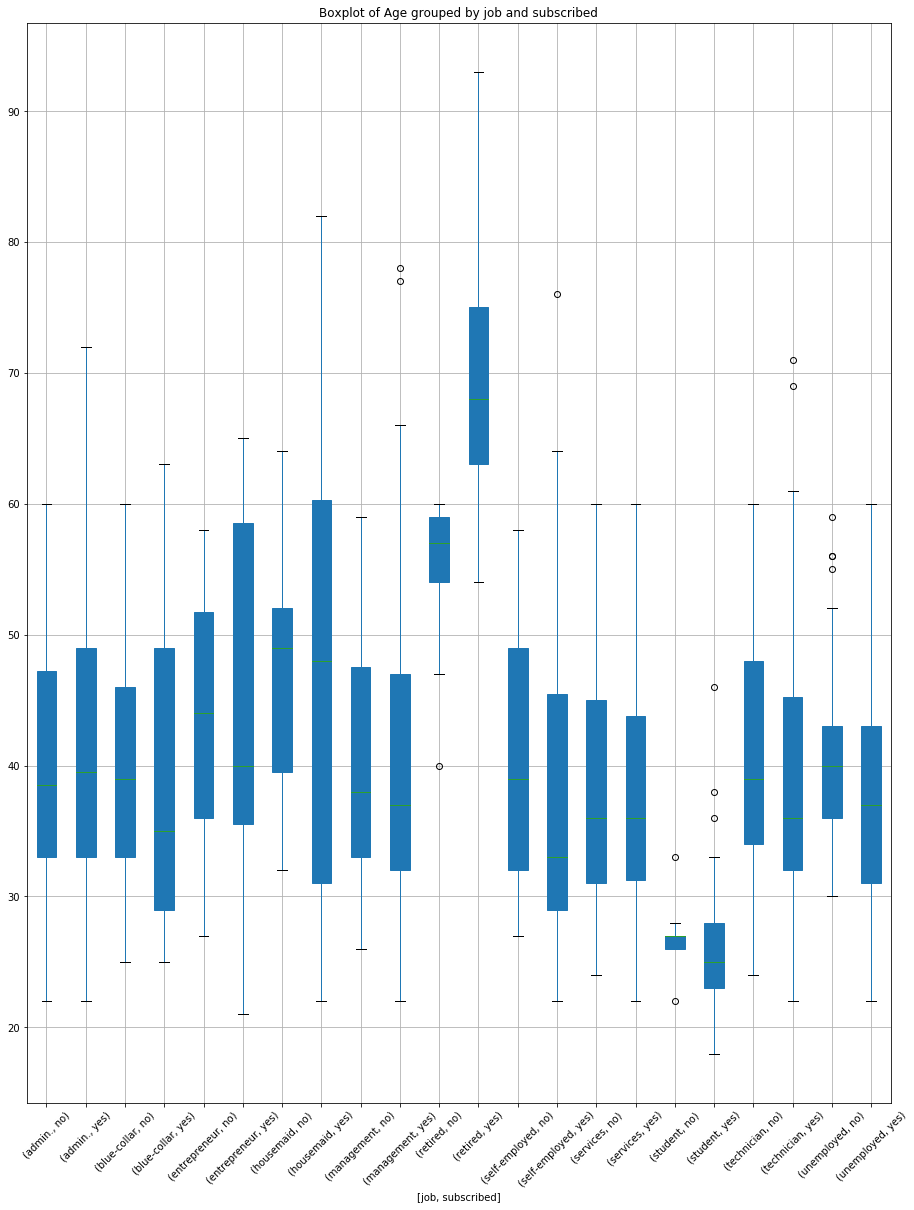

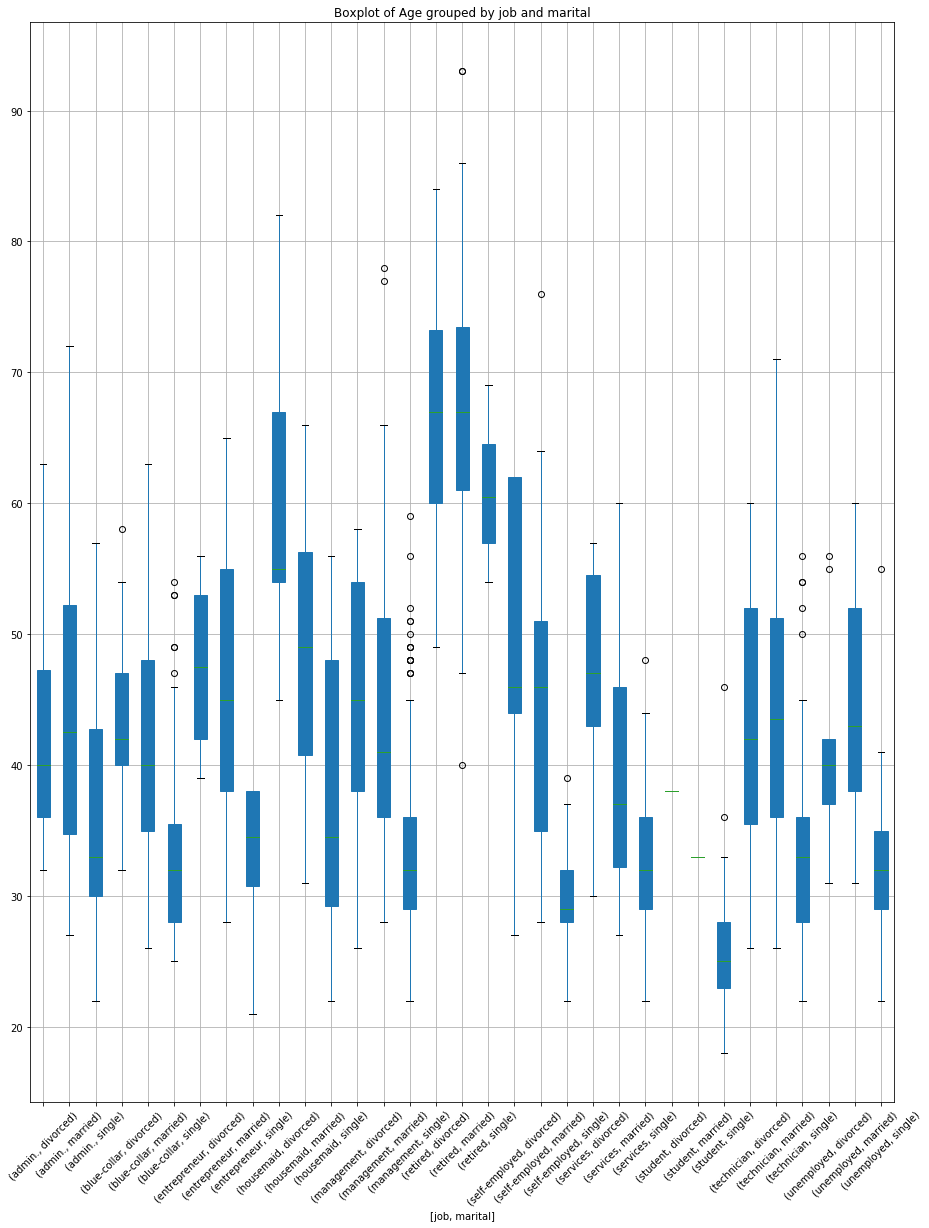

In [7]:
col_names = [['job','housing'], ['job','loan'], ['job','subscribed'], ['job','marital']]

fig = plt.figure(figsize=(15,20))
for counter, cols in enumerate(col_names):
    title = "Boxplot of Age grouped by " + col_names[counter][0] + " and " + col_names[counter][1]
    counter +=1
    data.boxplot(column='age', by=cols, figsize=(15,20), patch_artist = True, rot=45)
    plt.title(title)
    plt.suptitle("")

It looks like the boxplot of `age` by `job` and `marital` is showing more horizontal layers than the other boxplots. This might indicate that the **job** and **marital** attributes are the best at gaging someone's age.


In [8]:
table = data.pivot_table(values='age', 
                       index='job', 
                       columns='marital', 
                       aggfunc=np.median)
print(table)

marital        divorced  married  single
job                                     
admin.             40.0     42.5    33.0
blue-collar        42.0     40.0    32.0
entrepreneur       47.5     45.0    34.5
housemaid          55.0     49.0    34.5
management         45.0     41.0    32.0
retired            67.0     67.0    60.5
self-employed      46.0     46.0    29.0
services           47.0     37.0    32.0
student            38.0     33.0    25.0
technician         42.0     43.5    33.0
unemployed         40.0     43.0    32.0


In [9]:
# Define function to return an element of the pivot table
def get_element(x):
    return table.loc[x['job'], x['marital']]

# Replace missing values
data['age'].fillna(data[data['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [10]:
data['age'].describe()

count    2000.000000
mean       41.742000
std        12.711657
min        18.000000
25%        32.000000
50%        38.000000
75%        50.000000
max        93.000000
Name: age, dtype: float64

In [11]:
data['age'].isna().sum()

0

## Job

We remember from earlier that there are only 10 samples where `job` is null. We start by listing these samples to see if we can spot something obvious.

In [12]:
data[data['job'].isna()]

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
255,255,42.0,NaN,single,primary,no,2398,-1.418888,1.809977,yes,no,cellular,3,feb,144,2,271,2,failure,no
257,257,46.0,NaN,married,NaN,no,677,-0.399374,0.150261,no,no,cellular,3,feb,425,1,82,1,failure,no
831,831,41.0,NaN,single,primary,no,2398,-0.243804,-0.685437,yes,no,NaN,8,may,287,2,-1,0,NaN,no
1223,1223,55.0,NaN,married,secondary,no,2206,-1.134511,0.861389,no,no,cellular,12,aug,265,1,91,5,success,yes
1281,1281,50.0,NaN,married,NaN,no,558,-0.455001,1.595412,no,no,cellular,9,jul,464,1,683,6,failure,yes
1669,1669,54.0,NaN,married,secondary,no,2206,-0.575645,-0.242814,no,no,cellular,13,may,260,1,91,4,success,yes
1711,1711,77.0,NaN,married,NaN,no,397,-0.871514,0.134782,no,no,telephone,7,may,300,3,-1,0,NaN,yes
1801,1801,28.0,NaN,single,NaN,no,326,0.298961,1.653248,no,no,cellular,11,oct,450,1,231,1,success,yes
1868,1868,48.0,NaN,single,NaN,no,1819,0.680564,-0.786048,no,no,cellular,2,sep,1440,1,458,1,failure,yes
1975,1975,45.0,NaN,married,tertiary,no,406,-2.211965,2.109631,no,no,cellular,7,sep,314,1,-1,0,NaN,yes


We notice that the `age` distribution for the samples with no `job` is spread between 28 and 77 years old.
This age range might cover working age people as well as retirees. As a result we can't simply use the mean of the `job` category.

We notice that all the samples in the above table have an `age` entry. We can use this information to generate a function that will return the most common job for a given age and use it to fill the missing jobs.

### Generate the most common job for a given age

We need a helper function that will return the most common job for a given age. Later on we will use this function when **iterating over the dataframe** to replace the missing `job` cells.

In [13]:
def get_job_for_age(age):
    return data['job'][data['age']==age].mode()[0]

Test that the `get_job_for_age()` function works as expected.

In [14]:
print("Mode job for people aged 70:",get_job_for_age(77))
print("Mode job for people aged 30:",get_job_for_age(28))
print("Mode job for people aged 18:",get_job_for_age(18))

Mode job for people aged 70: retired
Mode job for people aged 30: management
Mode job for people aged 18: student


### Filling in the job using the most common job with the given age.

In [15]:
data['job'] = data.job.apply(lambda x: x if not pd.isnull(x) else get_job_for_age(data['age']))


Lets check that the operation was succeful by displaying the list of NAs in the job column

In [16]:
data[data['job'].isna()]

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed


## Education

<span style="color:red">TBD</span>

## Contact

My view would be to replace all the NaN with category of UNKNOWN. The advantage of doing this is that UNKNOWN would be accounted for when running the data['contact'].value_counts() 

<span style="color:red">TBD</span>

## Poutcome

My view would be to replace all the NaN with category of UNKNOWN. The advantage of doing this is that UNKNOWN would be accounted for when running the data['poutcome'].value_counts() 

<span style="color:red">TBD</span>

### Sanity check on the type of the features.
While working on this etivity I ran a buggy cell that introduced floats instead of objects in a column. Here we check this doesn't happen again. 
**Remove before submitting!!!**

In [17]:
data.dtypes

Unnamed: 0        int64
age             float64
job              object
marital          object
education        object
default          object
balance           int64
ratio_bal_ln    float64
ratio_ln_inc    float64
housing          object
loan             object
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
subscribed       object
dtype: object

# Task 2 (CS5062)

*Decide on the treatment of outliers in the bank data set. If appropriate, remove examples with extreme or unexpected attribute values, apply log transformation to numeric attributes with extreme values. Use other methods, if appropriate, to treat outliers as well. In your notebook, explain shortly (max 250 words) the decisions you have taken.*

## Numerical outliers

### Boxplots

Let's start by generating an array of boxplot showing the outliers for each numerical value in the data set.

In [18]:
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('Unnamed: 0')
print(numeric_features)

['age', 'balance', 'ratio_bal_ln', 'ratio_ln_inc', 'day', 'duration', 'campaign', 'pdays', 'previous']


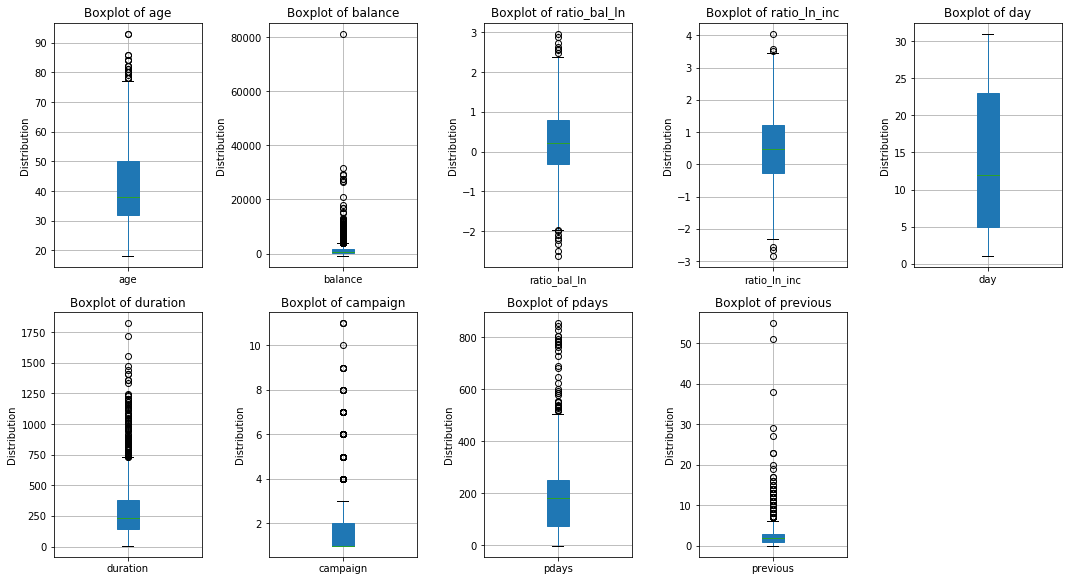

In [19]:
fig = plt.figure(figsize=(15,20))

for counter, feature in enumerate(numeric_features):
    counter +=1
    ax1 = fig.add_subplot(5, 5, counter)
    ax1.set_title("Boxplot of {}".format(feature))
    ax1.set_ylabel('Distribution')
    data.boxplot(column=feature, figsize=(5,25), patch_artist = True)
plt.tight_layout()


We can see that nearly all the numerical values have outliers as shown in the table below.

| Feature name | observations  | action |
|--------------|---------------|------|
|age           | Some outliers | These outliers are well spread out and appear to be correct. The age of a customer is an important factor to consider for a bank. We keep this information as is for now as changing it in any way would render it less readable. |
|balance       | One outlier skewing the graph. | value assumed correct. Use log function less the impact of the outliers|
|ratio_bal_ln  | Contains low positive and negative values which seems correct | Since it is used by the prediction algorithm we could **normalize** it to help with the learning. |
|ratio_ln_inc  | Contains low positive and negative values which seems correct | Since it is used by the prediction algorithm we could **normalize** it to help with the learning.|
|day           | No outliers | No action|
|duration      | Many outliers | No plan to use this feature for prediction. Ignore|
|campaign      | Outliers detected | No plan to use this feature for prediction. Ignore|
|pdays         | Outliers detected | No plan to use this feature for prediction. Ignore|
|previous      | Outliers detected | No plan to use this feature for prediction. Ignore|


### Histograms

Another approach for identifying outliers is to use histograms as shown below. Let's see how it compares to the array of boxplots we have just created.

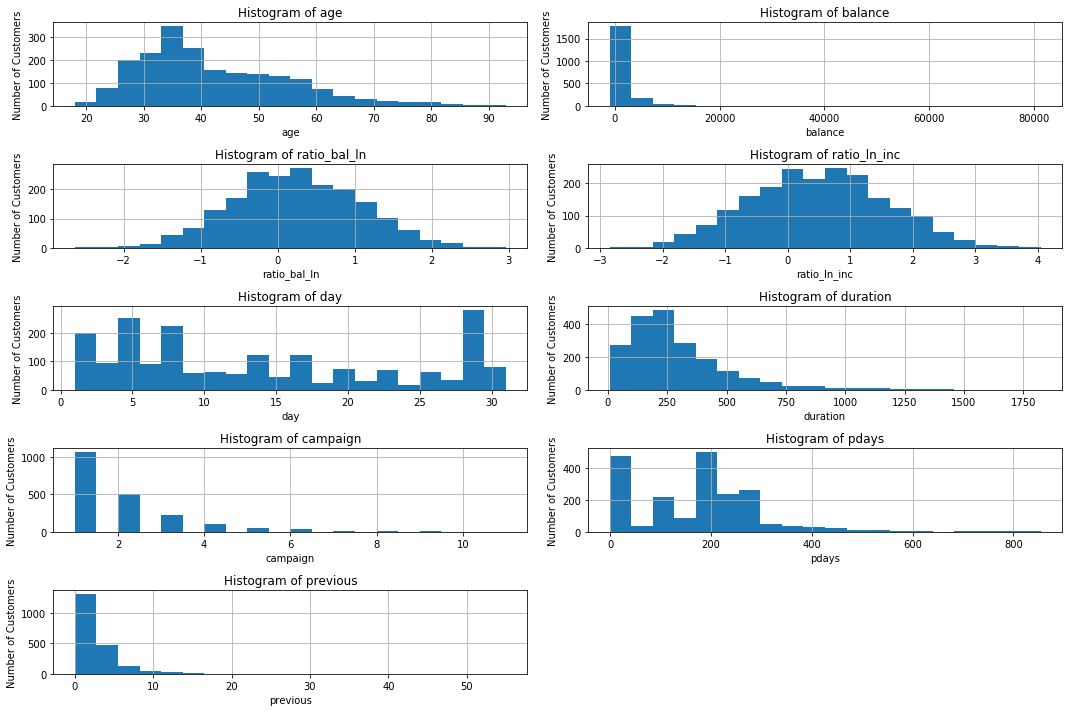

In [20]:
fig = plt.figure(figsize=(15,10))

for counter, feature in enumerate(numeric_features):
    # Plot Age
    counter +=1
    ax1 = fig.add_subplot(5, 2, counter)
    ax1.set_title("Histogram of {}".format(feature))
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Number of Customers')
    data[feature].hist(bins=20)
plt.tight_layout()

We can see from the above plot that there seem to be an outliner in the `balance` as the **x axis is streched** towards the 80000 value. There is clearly an outlier but, since this is a bank dataset, we expect the balance to be correct and we should not remove this value. Instead, to faciliate the work of any Machine Learning algorithm, we will scale the `balance` down using the **log function.**

We notice that the array of **histograms is less expressive** that the box plots when it comes to highlighting outliers. For some of the graphs, a streched X axis is the only indication that we have outliers as their **frequency is too low** to be represented as a bar. However, histograms are perfect for gauging the distribution of a feature.

### Dealing with outliers

#### Dealing with Age outliers

<span style="color:red">TBD</span>

#### Dealing with Balance outliers

In [37]:
# Use a log transformation to decrease the impact of extreme values in column LoanAmount
data['balance_log'] = np.log(data['balance'].replace(0, np.nan))

/home/michel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [22]:
# Replace the NaN with zeros
data['balance_log'] = data['balance_log'].replace(np.nan, 0)

# Alternative way to replace values:
# data['balance_log'].fillna(0, inplace=True)

Text(0.5,1,'Number of customers by balance')

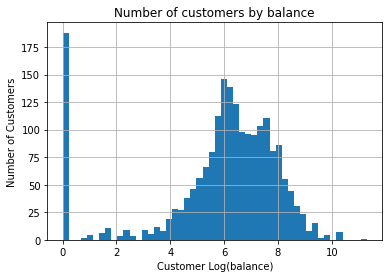

In [23]:
data['balance_log'].hist(bins=50)
plt.xlabel('Customer Log(balance)')
plt.ylabel('Number of Customers')
plt.title('Number of customers by balance')

We can see that a lot of customers have a balance of zero.

#### Dealing with ratio_bal_ln outliers

<span style="color:red">TBD</span>

#### Dealing with ratio_ln_inc outliers

<span style="color:red">TBD</span>

## Categorical outliers

Also I didn't find any litterature on the subject of categorical outliers, I am guessing they can happen and can be the result of a typo for example. Let's see if we can find some.

In [24]:
data.describe(exclude=[np.number])

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,2000,2000,1896,2000,2000,2000,1809,2000,1546,2000
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,no,no,cellular,feb,failure,yes
freq,471,1111,995,1985,1037,1750,1663,404,955,1000


In [25]:
categories = data.select_dtypes(exclude=[np.number]).columns.tolist()
print(categories)
for category in categories:
    print("\n{}:".format(category))
    print(data[category].value_counts())

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']

job:
management       471
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

marital:
married     1111
single       674
divorced     215
Name: marital, dtype: int64

education:
secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

default:
no     1985
yes      15
Name: default, dtype: int64

housing:
no     1037
yes     963
Name: housing, dtype: int64

loan:
no     1750
yes     250
Name: loan, dtype: int64

contact:
cellular     1663
telephone     146
Name: contact, dtype: int64

month:
feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104
oct     93
mar     70
nov     68
dec     41
Name: month, dtype: int64

poutcome:
failure    955
suc

**No outliers** were detected in the categorical features. **No action required**.

# Task 3 (CS5062)

*Suggest the creation of at least one new feature from the existing ones and justify the usefulness of your choice within the context of the 2-class classification problem you have defined in E-tivity 1.*

In [26]:
data.head()

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,...,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,balance_log
0,0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,...,cellular,1,apr,957,2,131,2,failure,no,5.971262
1,1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,...,cellular,1,apr,233,2,133,1,failure,no,6.533789
2,2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,...,cellular,1,apr,126,2,239,1,failure,no,6.942157
3,3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,...,cellular,1,apr,274,1,238,2,failure,no,5.986452
4,4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,...,cellular,1,apr,479,1,307,1,failure,no,6.911747


I would create a new feature that summarizes the **financial health** of a customer.
  * This new measure would help the bank decide if they should persue contacting a customer or not.
  * It would be based on:
    * age
    * job
    * marital
    * education
    * default
    * balance
    * ratio_bal_ln
    * ratio_ln_inc
    * housing
  * It could be calculated by converting the categorical values to numerical and running PCA. Therefore it would be a numeric value.

<span style="color:red">Not sure of the feature described below.</span>

I would create another feature that would define if a customer is ready for a "marketing campaign". It would return *yes* if the customer has not been contacted in the last 6 months, and has has a `contact` number.
  * It would be based on:
    * contact
    * month
  * It would be a 2D categorical value:
    * yes
    * no

# Task 4 (CE6002)

*Using the dataset you prepared, perform a classification on the data using scikitlearn’s logistic regression.*

*Generate plots of the approximate probability P[Ein-Eout|>e]. You can use the exact same approach as in E-tivity 1. In the same figure, plot the Hoeffding bound and the VC bound and check whether or not either bound is exceeded (indicate this clearly in a markdown cell).*


## Logistic regression

### Prepare the data
Steps followed to prepare the data for logistic regression:
  * Extract the features
  * Extract the target
  * Shuffle the data and split between training and testing data
  * Fit the model on the training data set


In [27]:
# extract features
feature_cols = ['ratio_bal_ln', 'ratio_ln_inc']
X = data.loc[:, feature_cols].values

# extract target
data['subscribed_code'] = data['subscribed'].map({'yes': 1, 'no': -1})
y = data.subscribed_code

# shuffle and split
X_shuffled, y_shuffled = shuffle(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2)
print ("X_train.shape:{}, y_train.shape:{}".format(X_train.shape, y_train.shape))
print ("X_test.shape :{}, y_test.shape :{}".format(X_test.shape, y_test.shape))


X_train.shape:(1600, 2), y_train.shape:(1600,)
X_test.shape :(400, 2), y_test.shape :(400,)


### Fit the model
Use testing data to fit the logistic regression

In [28]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Test the model
Use training data to test the model

In [29]:
prediction = logistic_reg.predict(X_test)
#print(prediction)

predict_proba = logistic_reg.predict_proba(X_test) 
#print(predict_proba)


### Calculate Ein and Eout

<span style="color:red">Here we are calculating Ein and Eout for the Logistic Regression algorithm. **Need to clarify if this is ok** or if we should use the same technic as in Etivity 1 to evaluate them?</span>


According to the documentation: 
> score(X, y[, sample_weight]) 	
> Returns the mean accuracy on the given test data and labels.

Calling `score()` on both the training data set and testing data set should give us the **Ein** and **Eout** we are looking for plotting the VC bounds

Documentation link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [30]:
Ein = 1 - logistic_reg.score(X_train, y_train)
print("Ein:", Ein)

Eout = 1 - logistic_reg.score(X_test, y_test)
print("Eout:", Eout)

Ein: 0.22187500000000004
Eout: 0.1975


## Plot the approximate probability P[Ein-Eout|>e] with Hoeffding and VC bounds


In [31]:
# Calculate probabily of epsilon
# Lets reuse some of the code we created for Etivity 1
def calc_prob_epsilon(M, Eins, Eouts, epsilons):
    prob_epsilon=[]
    for e in epsilons:   
        counter = 0
        for i in range(M):
            if abs(Eins[i] - Eouts[i])>e:
                   counter +=1
        prob_epsilon.append(counter/M)           
    return prob_epsilon

In [32]:
epsilons = np.arange(0, 1, 0.01)
Eins = [Ein]
Eouts = [Eout]
prob_epsilon = calc_prob_epsilon(1, Eins, Eouts, epsilons)

print("epsilon proba. dist:", prob_epsilon)

epsilon proba. dist: [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


<span style="color:red">How do we plot the VC dimension? I am thinking that since the Logistic Regression is two dimensional, the same VC dimension as the percepton should apply. **Is this correct???**</span>

In [33]:
# initialise some variables
epsilons = np.arange(0, 1, 0.01)
N=2000

In [34]:
# vc bound
tolerance = 0.01
dvc = 3
def get_vc_bound(N, dvc, tolerance, Ein):
    return Ein + math.sqrt((1/(2*N)) * math.log((2 * (math.pow(N,dvc) + 1)/tolerance) ))

print(get_vc_bound(N, dvc, tolerance, Ein))

0.30569180133675367


<function matplotlib.pyplot.show(*args, **kw)>

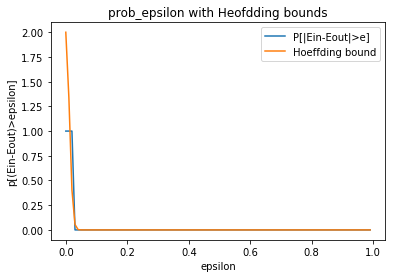

In [35]:
plt.figure()
plt.plot(epsilons, prob_epsilon, label='P[|Ein-Eout|>e]')
plt.plot(epsilons, [2*math.exp(-2*e**2*N) for e in epsilons], label='Hoeffding bound')
plt.xlabel('epsilon')
plt.ylabel('p[(Ein-Eout)>epsilon]')
plt.title('prob_epsilon with Heofdding bounds')
plt.legend(loc='upper right')
plt.show

# Task 5 (CE6002)

*Using the dataset, make learning curves for logistic regression and two other machine learning algorithms of your choosing using scikitlearn’s learning_curve functionality. Choose one algorithm with low complexity in terms of VC dimension and one algorithm with high complexity.*

*Comment on what information you can derive from the learning curves  (in a markdown cell) and how this information differs between simple and complex machine learning algorithms.*

**NOTES**:
important reading for plotting the learning curve:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

<span style="color:red">Work in progress.</span>

train_sizes :
 [ 106  346  586  826 1066]
train_scores:
 [[0.74528302 0.80188679 0.80188679]
 [0.72543353 0.77745665 0.77745665]
 [0.74914676 0.7883959  0.78498294]
 [0.75423729 0.77723971 0.77118644]
 [0.77298311 0.79362101 0.76923077]]
test_scores :
 [[0.76779026 0.74108818 0.7879925 ]
 [0.78838951 0.75609756 0.79924953]
 [0.78838951 0.75422139 0.8011257 ]
 [0.79026217 0.75797373 0.79924953]
 [0.78464419 0.75234522 0.79549719]]
train_sizes :
 [ 106  346  586  826 1066]
train_scores:
 [[0.76415094 0.80188679 0.80188679]
 [0.73410405 0.78323699 0.78323699]
 [0.75767918 0.7883959  0.78156997]
 [0.75302663 0.77845036 0.77118644]
 [0.77298311 0.79174484 0.7673546 ]]
test_scores :
 [[0.77715356 0.72795497 0.78611632]
 [0.78464419 0.75422139 0.79362101]
 [0.78464419 0.74859287 0.79549719]
 [0.79026217 0.75609756 0.78986867]
 [0.78651685 0.75234522 0.78986867]]


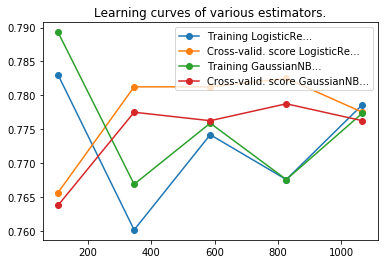

In [36]:
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB

def plot_learning(estimator):
    cv=None
    n_jobs=None
    train_sizes=np.linspace(.1, 1.0, 5)

    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    print("train_sizes :\n", train_sizes)
    print("train_scores:\n", train_scores)
    print("test_scores :\n", test_scores)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    label_train = "Training " + str(estimator)[:10] + "..."
    label_cross_valid = "Cross-valid. score " + str(estimator)[:10] + "..."
   
    plt.plot(train_sizes, train_scores_mean, 'o-', label=label_train)
    plt.plot(train_sizes, test_scores_mean, 'o-', label=label_cross_valid)
    plt.legend(loc="best")
    plt.title("Learning curves of various estimators.")

estimators = [LogisticRegression(), GaussianNB()]

for e in estimators:
    plot_learning(e)